In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
from joblib import dump, load

%matplotlib inline

In [2]:
df = pd.read_csv('halooglasi_data_20191117.csv')
df = df[df['City']=='Beograd']

## Data Exploration

In [3]:
df.head()

,Ad_Type,City,City_Area,City_Subarea,Condition,Currency,Desc,Flag_Roomy,Flag_Penthouse,Flag_Exchange_OK,...,Number_of_Busses,Number_of_Trams,Number_of_Trolleys,Object_Type,Posted_By,Price,Property_Size_sqmtr,Property_Type,Publish_Date,Street
0,Premium,Beograd,Opština Vračar,Krunska,Lux,€,AGENCIJSKA PROVIZIJA 2% OPIS NEKRETNINE: Uknji...,-1,-1,-1,...,3,0,4,NaN,Agencija,300000,108,Stan,06.11.2019,Kneginje Zorke
1,Premium,Beograd,Opština Zvezdara,Kluz,Izvorno stanje,€,"Dvoiposoban stan neto površine 65,00 m2 po cen...",-1,1,-1,...,0,0,0,Novogradnja,Investitor,103409,65,Stan,06.11.2019,Živka Davidovića 81
2,Premium,Beograd,Opština Vračar,Hram svetog Save,NaN,€,"HITNA PRODAJA! Hram, Patrijarha Varnave, 4.0, ...",-1,-1,-1,...,0,0,0,Novogradnja,Agencija,400000,185,Stan,06.11.2019,Patrijarha Varnave
3,Premium,Beograd,Opština Savski venac,Beograd na vodi,Lux,€,"Ekskluzivan, DELUXE stan, BEOGRAD NA VODI - zg...",-1,-1,-1,...,0,0,0,Novogradnja,Agencija,270000,80,Stan,NaN,Vista
4,Premium,Beograd,Opština Zemun,Donji grad,Izvorno stanje,€,Stan se nalazi u lameli 8 u IV fazi izgradnje ...,-1,-1,-1,...,0,0,0,Novogradnja,Investitor,267600,"127,44",Stan,06.11.2019,Petra Kočića


In [4]:
df.describe()

,Flag_Roomy,Flag_Penthouse,Flag_Exchange_OK,Flag_Under_Mortgage,Flag_Rooftop,Flag_FrenchBalcony,Flag_HotWater,Flag_Fireplace,Flag_AirConditioning,Flag_Available_Immediately,...,Flag_Not_Part_of_House,Flag_Parking,Flag_Surveliance,Flag_Telephone,Flag_VAT_return,Max_Floors,Number_of_Busses,Number_of_Trams,Number_of_Trolleys,Price
count,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,...,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,1.961400e+04
mean,-0.911084,-0.986336,-0.990925,-0.997247,-0.981850,-0.964107,-0.932803,-0.988172,-0.384113,-0.429897,...,-0.839196,-0.477108,-0.723463,-0.025390,-0.918426,5.395585,5.366320,0.988223,0.587794,1.287818e+05
std,0.412231,0.164749,0.134420,0.074155,0.189666,0.265520,0.360396,0.153355,0.923309,0.902901,...,0.543842,0.878867,0.690381,0.999703,0.395604,4.647431,5.356505,1.756419,1.372764,1.091271e+05
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000e+02
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,2.000000,0.000000,0.000000,6.360050e+04
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,4.000000,0.000000,0.000000,9.800000e+04
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.000000,6.000000,7.000000,2.000000,0.000000,1.588880e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,34.000000,8.000000,7.000000,1.500000e+06


In [5]:
# clean data and calculate new columns
df['Property_Size_sqmtr']=df['Property_Size_sqmtr'].str.split(',',expand=True)[0]
df['Property_Size_sqmtr']=df['Property_Size_sqmtr'].str.split('.',expand=True)[0].astype(int)

df['Price_sqmtr']=df['Price']/df['Property_Size_sqmtr']

In [11]:
# probably error in the data
df[df['Property_Size_sqmtr']<10]

,Ad_Type,City,City_Area,City_Subarea,Condition,Currency,Desc,Flag_Roomy,Flag_Penthouse,Flag_Exchange_OK,...,Number_of_Trams,Number_of_Trolleys,Object_Type,Posted_By,Price,Property_Size_sqmtr,Property_Type,Publish_Date,Street,Price_sqmtr
2087,Standard,Beograd,Opština Voždovac,Lekino brdo,NaN,€,(agencijska provizija 2%) Poslovna zgada na V ...,-1,-1,-1,...,0,0,NaN,Agencija,1100000,1,Stan,05.11.2019,Trebinjska,1.100000e+06
3672,Standard,Beograd,Opština Voždovac,Medaković 2,NaN,€,"Agencijski ID: 11725, pr/2, garaza, parking, d...",-1,-1,-1,...,0,1,NaN,Agencija,1000000,1,Stan,04.11.2019,Mokroluška,1.000000e+06
6632,Standard,Beograd,Opština Palilula,Borča,Izvorno stanje,€,NaN,-1,-1,-1,...,0,0,Novogradnja,Agencija,30200,4,Stan,30.10.2019,KOD INTEZE,7.550000e+03
7151,Standard,Beograd,Opština Palilula,Borča,Lux,€,NaN,-1,-1,-1,...,0,0,Stara gradnja,Agencija,36000,3,Stan,30.10.2019,Kosovska,1.200000e+04
7172,Standard,Beograd,Opština Palilula,Borča,NaN,€,"izuzetan kvalitet gradnje, granitna keramika ,...",-1,-1,-1,...,0,0,Novogradnja,Agencija,26600,3,Stan,30.10.2019,NaN,8.866667e+03
7914,Standard,Beograd,Opština Rakovica,Petlovo brdo,Renovirano,€,Agencije isključene! Prodajem jednoiposoban st...,-1,-1,-1,...,0,0,Novogradnja,Vlasnik,45000,4,Stan,28.10.2019,NaN,1.125000e+04
8286,Standard,Beograd,Opština Vračar,Kalenić pijaca,NaN,€,Stan se nalazi na atraktivnoj lokaciji. Izrazi...,-1,-1,-1,...,4,0,NaN,Agencija,220000,5,Stan,28.10.2019,Kičevska,4.400000e+04
9325,Standard,Beograd,Opština Zemun,Kej,NaN,€,Hostel na elitnom mestu. Raspolaže sa 30 ležaj...,-1,-1,-1,...,0,0,NaN,Agencija,550000,1,Stan,26.10.2019,Karađorđev Trg,5.500000e+05
12248,Standard,Beograd,Opština Barajevo,Šiljakovac,Izvorno stanje,€,"NJiva 2,5 ha na dobroj lokaciji za svaku prepo...",-1,-1,-1,...,0,0,U izgradnji,Agencija,10000,2,Stan,21.10.2019,6 licke,5.000000e+03
15724,Standard,Beograd,Opština Savski venac,Beograd na vodi,Lux,€,Spektakularan 4.0 stan sa dve terase koji spaj...,-1,-1,-1,...,0,0,Novogradnja,Agencija,449888,1,Stan,14.10.2019,SIMFONIJA 1201,4.498880e+05


In [12]:
# drop these extreme values
df.drop(df[df['Property_Size_sqmtr']<10].index, inplace = True)

In [13]:
avg = df.groupby(['City_Area']).mean()[['Price_sqmtr']].reset_index()
cnt = df.groupby(['City_Area']).count()[['Ad_Type']].reset_index()
summary = pd.merge(left=cnt, right=avg[['Price_sqmtr']], left_index=True, right_index=True)

In [14]:
# see average price and number of postings for Belgrade municipalities
summary.sort_values(by='Price_sqmtr')

,City_Area,Ad_Type,Price_sqmtr
0,Opština Barajevo,39,435.778327
3,Opština Mladenovac,4,602.804048
5,Opština Obrenovac,8,663.568149
1,Opština Grocka,112,721.195875
9,Opština Sopot,2,729.622642
2,Opština Lazarevac,19,778.080237
7,Opština Rakovica,1287,984.433683
11,Opština Surčin,32,1059.069367
14,Opština Zemun,1346,1215.375772
6,Opština Palilula,1918,1225.287351


In [15]:
avg1 = df.groupby(['Condition','City_Area']).mean()[['Price_sqmtr']].reset_index()
cnt1 = df.groupby(['Condition','City_Area']).count()[['Ad_Type']].reset_index()
summary1 = pd.merge(left=cnt1, right=avg1[['Price_sqmtr']], left_index=True, right_index=True)

In [16]:
# price differences between different conditions
summary1.sort_values(by=['City_Area','Condition'])

,Condition,City_Area,Ad_Type,Price_sqmtr
0,Izvorno stanje,Opština Barajevo,19,487.145274
29,Renovirano,Opština Barajevo,12,395.398693
1,Izvorno stanje,Opština Grocka,19,732.875450
16,Lux,Opština Grocka,6,842.427606
30,Renovirano,Opština Grocka,12,702.774548
44,Za renoviranje,Opština Grocka,1,442.222222
2,Izvorno stanje,Opština Lazarevac,5,820.373758
17,Lux,Opština Lazarevac,3,886.999423
31,Renovirano,Opština Lazarevac,5,711.231197
45,Za renoviranje,Opština Lazarevac,4,748.577285


## Adding Latitude and Longitude

In [17]:
df['Full_Address'] = 'Ulica ' + df['Street'] + ' , ' + df['City_Area'] + ' , ' + df['City']

In [19]:
# extract latitude and longitude for addresses provided + coordinates for municipalities
import geocoder

lat = []
lng = []
area_up_lat = []
area_up_lng = []
area_low_lat = []
area_low_lng = []

for i in range(df.shape[0]):
    try:
        
        g = geocoder.here(df.iloc[i]['Full_Address'],app_code='-YNo0dU3B52bdC8AVR_nwA',app_id='TiWIaGqDr3e64oWcYsmg').json
        lat.append(g['lat'])
        lng.append(g['lng'])
        area_up_lat.append(g['bbox']['northeast'][0])
        area_up_lng.append(g['bbox']['northeast'][1])
        area_low_lat.append(g['bbox']['southwest'][0])
        area_low_lng.append(g['bbox']['southwest'][1])
    except:
        lat.append(0.0)
        lng.append(0.0)
        area_up_lat.append(0.0)
        area_up_lng.append(0.0)
        area_low_lat.append(0.0)
        area_low_lng.append(0.0)

In [20]:
df['Address_Lat'] = lat
df['Address_Lng'] = lng
df['City_Area_Up_Lat'] = area_up_lat
df['City_Area_Up_Lng'] = area_up_lng
df['City_Area_Low_Lat'] = area_low_lat
df['City_Area_Low_Lng'] = area_low_lng

In [21]:
# save new data
df.to_csv('belgrade_data.csv',index=False)

## Further Data Exploration

In [2]:
df = pd.read_csv('belgrade_data.csv')

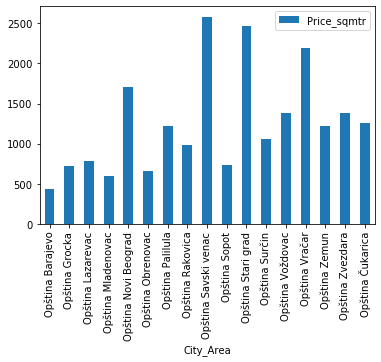

In [3]:
df.groupby('City_Area').mean().reset_index().plot(x='City_Area',y='Price_sqmtr',kind='bar')

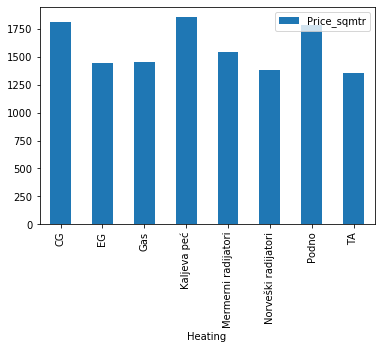

In [4]:
# price per sqmt based on heating type
df.groupby('Heating').mean().reset_index().plot(x='Heating',y='Price_sqmtr',kind='bar')

In [5]:
# drop unecessary columns
df.drop(['City','City_Subarea','Link_to_Property','Property_Type','Currency', 'Street','Full_Address','Publish_Date','Desc','Address_Lat','Address_Lng','City_Area_Up_Lat','City_Area_Up_Lng','City_Area_Low_Lat','City_Area_Low_Lng'],axis=1,inplace=True)
df.head()

,Ad_Type,City_Area,Condition,Flag_Roomy,Flag_Penthouse,Flag_Exchange_OK,Flag_Under_Mortgage,Flag_Rooftop,Flag_FrenchBalcony,Flag_HotWater,...,Max_Floors,No_of_Rooms,Number_of_Busses,Number_of_Trams,Number_of_Trolleys,Object_Type,Posted_By,Price,Property_Size_sqmtr,Price_sqmtr
0,Premium,Opština Vračar,Lux,-1,-1,-1,-1,-1,-1,-1,...,6,4.0,3,0,4,NaN,Agencija,300000,108,2777.777778
1,Premium,Opština Zvezdara,Izvorno stanje,-1,1,-1,-1,-1,-1,-1,...,5,2.5,0,0,0,Novogradnja,Investitor,103409,65,1590.907692
2,Premium,Opština Vračar,NaN,-1,-1,-1,-1,-1,-1,-1,...,5,4.0,0,0,0,Novogradnja,Agencija,400000,185,2162.162162
3,Premium,Opština Savski venac,Lux,-1,-1,-1,-1,-1,-1,-1,...,23,3.0,0,0,0,Novogradnja,Agencija,270000,80,3375.000000
4,Premium,Opština Zemun,Izvorno stanje,-1,-1,-1,-1,-1,-1,-1,...,8,5.0,0,0,0,Novogradnja,Investitor,267600,127,2107.086614


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ad_Type','Posted_By','Price'],axis=1), df['Price'], test_size=0.3, random_state=100)

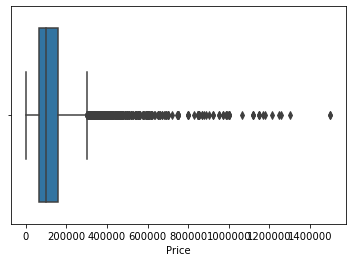

In [7]:
sns.boxplot(x=y_train)

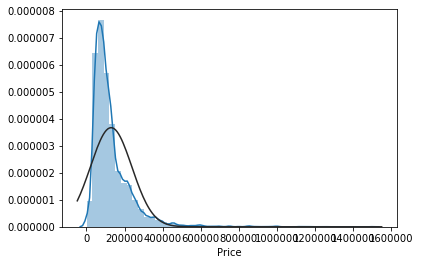

In [8]:
# price distribution is highly skewed - possibly log transformation
sns.distplot(y_train, fit=stats.norm)

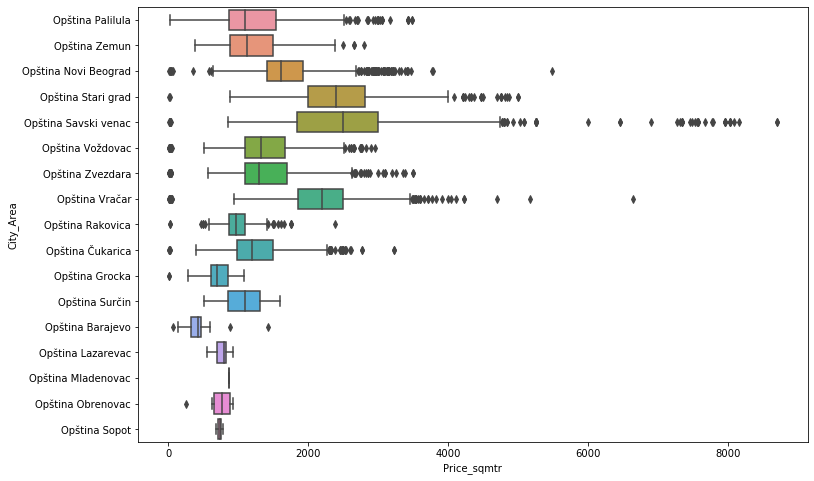

In [9]:
#clearly there are outliers in the data
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(y=X_train['City_Area'], x=X_train['Price_sqmtr'])

In [10]:
def treat_outliers(pd_series):
    'Outlier treatment using 1.5*IQR range to detect outliers. Input/Output-> pandas Series'
    nm = pd_series.name
    
    Q1 = pd_series.quantile(0.25)
    Q3 = pd_series.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    pd_series = np.where(pd_series > upper, upper, pd_series)
    pd_series = pd.Series(np.where(pd_series < lower, lower, pd_series))
    
    pd_series
    return pd_series.rename(nm)
    
y_train = treat_outliers(y_train)
X_train['Price_sqmtr'] = treat_outliers(X_train['Price_sqmtr'])
y_test = treat_outliers(y_test)

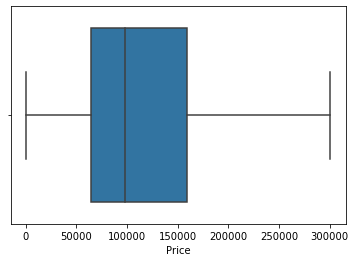

In [11]:
sns.boxplot(x=y_train)

In [12]:
# adding new features
avg = X_train.groupby(['City_Area']).mean()[['Price_sqmtr']].reset_index()
avg1 = X_train.groupby(['Condition','City_Area']).mean()[['Price_sqmtr']].reset_index()
avg.columns = ['City_Area','Price_sqmtr_0']
avg1.columns = ['Condition','City_Area','Price_sqmtr_1']

X_train = pd.merge(X_train, avg, on=['City_Area'],how='left')
X_train = pd.merge(X_train, avg1, on=['Condition','City_Area'],how='left')
X_test = pd.merge(X_test, avg, on=['City_Area'],how='left')
X_test = pd.merge(X_test, avg1, on=['Condition','City_Area'],how='left')

In [64]:
avg.to_csv('avg_prices_by_city_area.csv')
avg1.to_csv('avg_prices_by_condition.csv')

In [14]:
def municipality_mapping(val):
    if val in ['Opština Sopot','Opština Mladenovac','Opština Obrenovac','Opština Lazarevac','Opština Barajevo','Opština Grocka']:
        return 1
    elif val in ['Opština Surčin','Opština Rakovica','Opština Čukarica']:
        return 2
    elif val == 'Opština Palilula':
        return 3
    elif val in ['Opština Zemun','Opština Zvezdara','Opština Voždovac']:
        return 4    
    elif val == 'Opština Novi Beograd':
        return 5
    elif val in ['Opština Stari grad', 'Opština Savski venac','Opština Vračar']:
        return 6
    else:
        return -1

def floor_mapping(val):
    if val == 'PR':
        return 0
    elif val == 'VPR':
        return 0.5
    elif val == 'PSUT':
        return -0.5
    elif val == 'SUT':
        return -0.5
    else:
        return val

def heating_mapping(val):
    if val in ['Gas', 'Mermerni radijatori','Norveški radijatori','TA']:
        return 1
    elif val in ['CG','EG']:
        return 2
    elif val in ['Kraljeva peć','Podno']:
        return 3
    else: 
        return -1

# remap character columns to numeric
def remap_cols(df):
    df['Condition'] = df['Condition'].replace(['Izvorno stanje','Za renoviranje','Renovirano', 'Lux'], [1,2,3,4])

    df['Object_Type'] = df['Object_Type'].replace(['Stara gradnja','Novogradnja','U izgradnji'], [1,2,2])

    df['No_of_Rooms'] = df['No_of_Rooms'].replace('5+', 6)
    df['No_of_Rooms'] = df['No_of_Rooms'].apply(float)

    df['Floor'] = df['Floor'].apply(floor_mapping)
    df['Floor'] = df['Floor'].apply(float)

    df['City_Area'] = df['City_Area'].apply(municipality_mapping)

    df['Heating'] = df['Heating'].apply(heating_mapping)

    df.fillna(-1, inplace=True)
    return df

In [15]:
X_train.select_dtypes(['object']).head()

,City_Area,Condition,Floor,Heating,No_of_Rooms,Object_Type
0,Opština Palilula,NaN,VPR,TA,2.0,Stara gradnja
1,Opština Zemun,NaN,PR,TA,2.0,NaN
2,Opština Novi Beograd,Izvorno stanje,PR,CG,1.5,Stara gradnja
3,Opština Palilula,Renovirano,8,CG,1.0,NaN
4,Opština Stari grad,NaN,5,CG,3.0,Stara gradnja


In [16]:
X_train = remap_cols(X_train)
X_test = remap_cols(X_test)

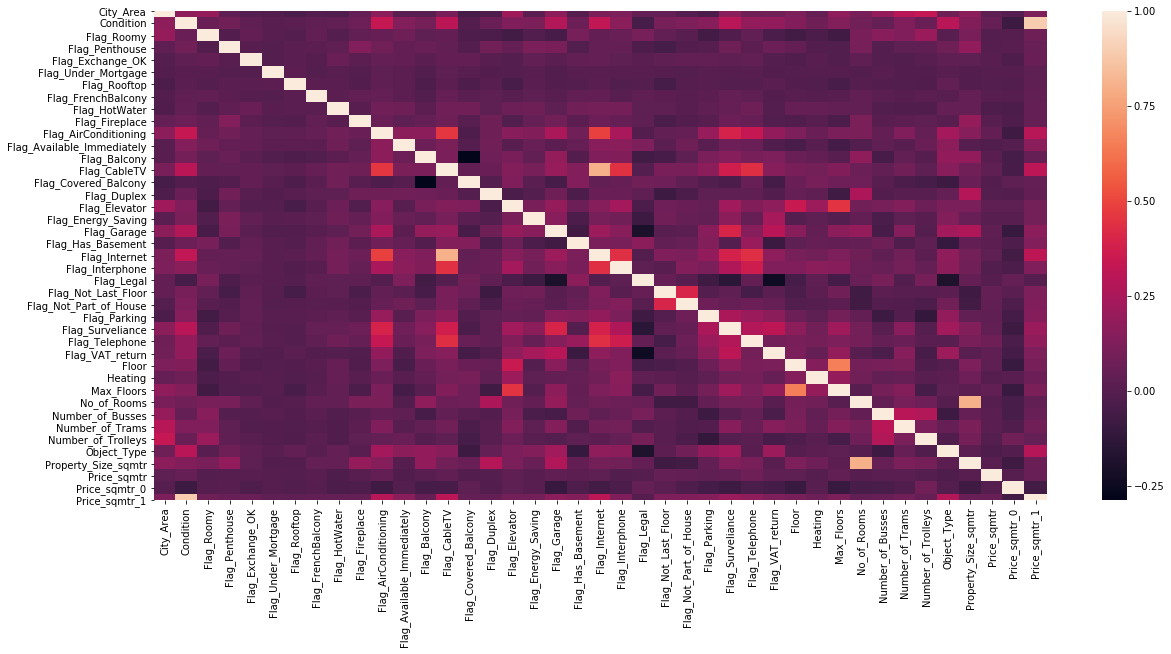

In [17]:
corr = X_train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [18]:
high_corr=corr.stack().reset_index()
high_corr=high_corr[high_corr['level_0']!=high_corr['level_1']]

In [19]:
# as expected - cable and internet are highly correlated
high_corr[high_corr[0]>0.5]

,level_0,level_1,0
81,Condition,Price_sqmtr_1,0.893308
553,Flag_CableTV,Flag_Internet,0.803812
833,Flag_Internet,Flag_CableTV,0.803812
1220,Floor,Max_Floors,0.655982
1300,Max_Floors,Floor,0.655982
1349,No_of_Rooms,Property_Size_sqmtr,0.807067
1549,Property_Size_sqmtr,No_of_Rooms,0.807067
1641,Price_sqmtr_1,Condition,0.893308


In [20]:
# correlation with target
price_corr = pd.concat([X_train, y_train], axis=1, sort=False).corr().stack().reset_index()

In [21]:
# top 10 correlated values with target
top_10_price_corr = price_corr[price_corr.level_0=='Price'].sort_values(by=0,ascending=False).head(10)['level_1']
var = top_10_price_corr.values[1:]

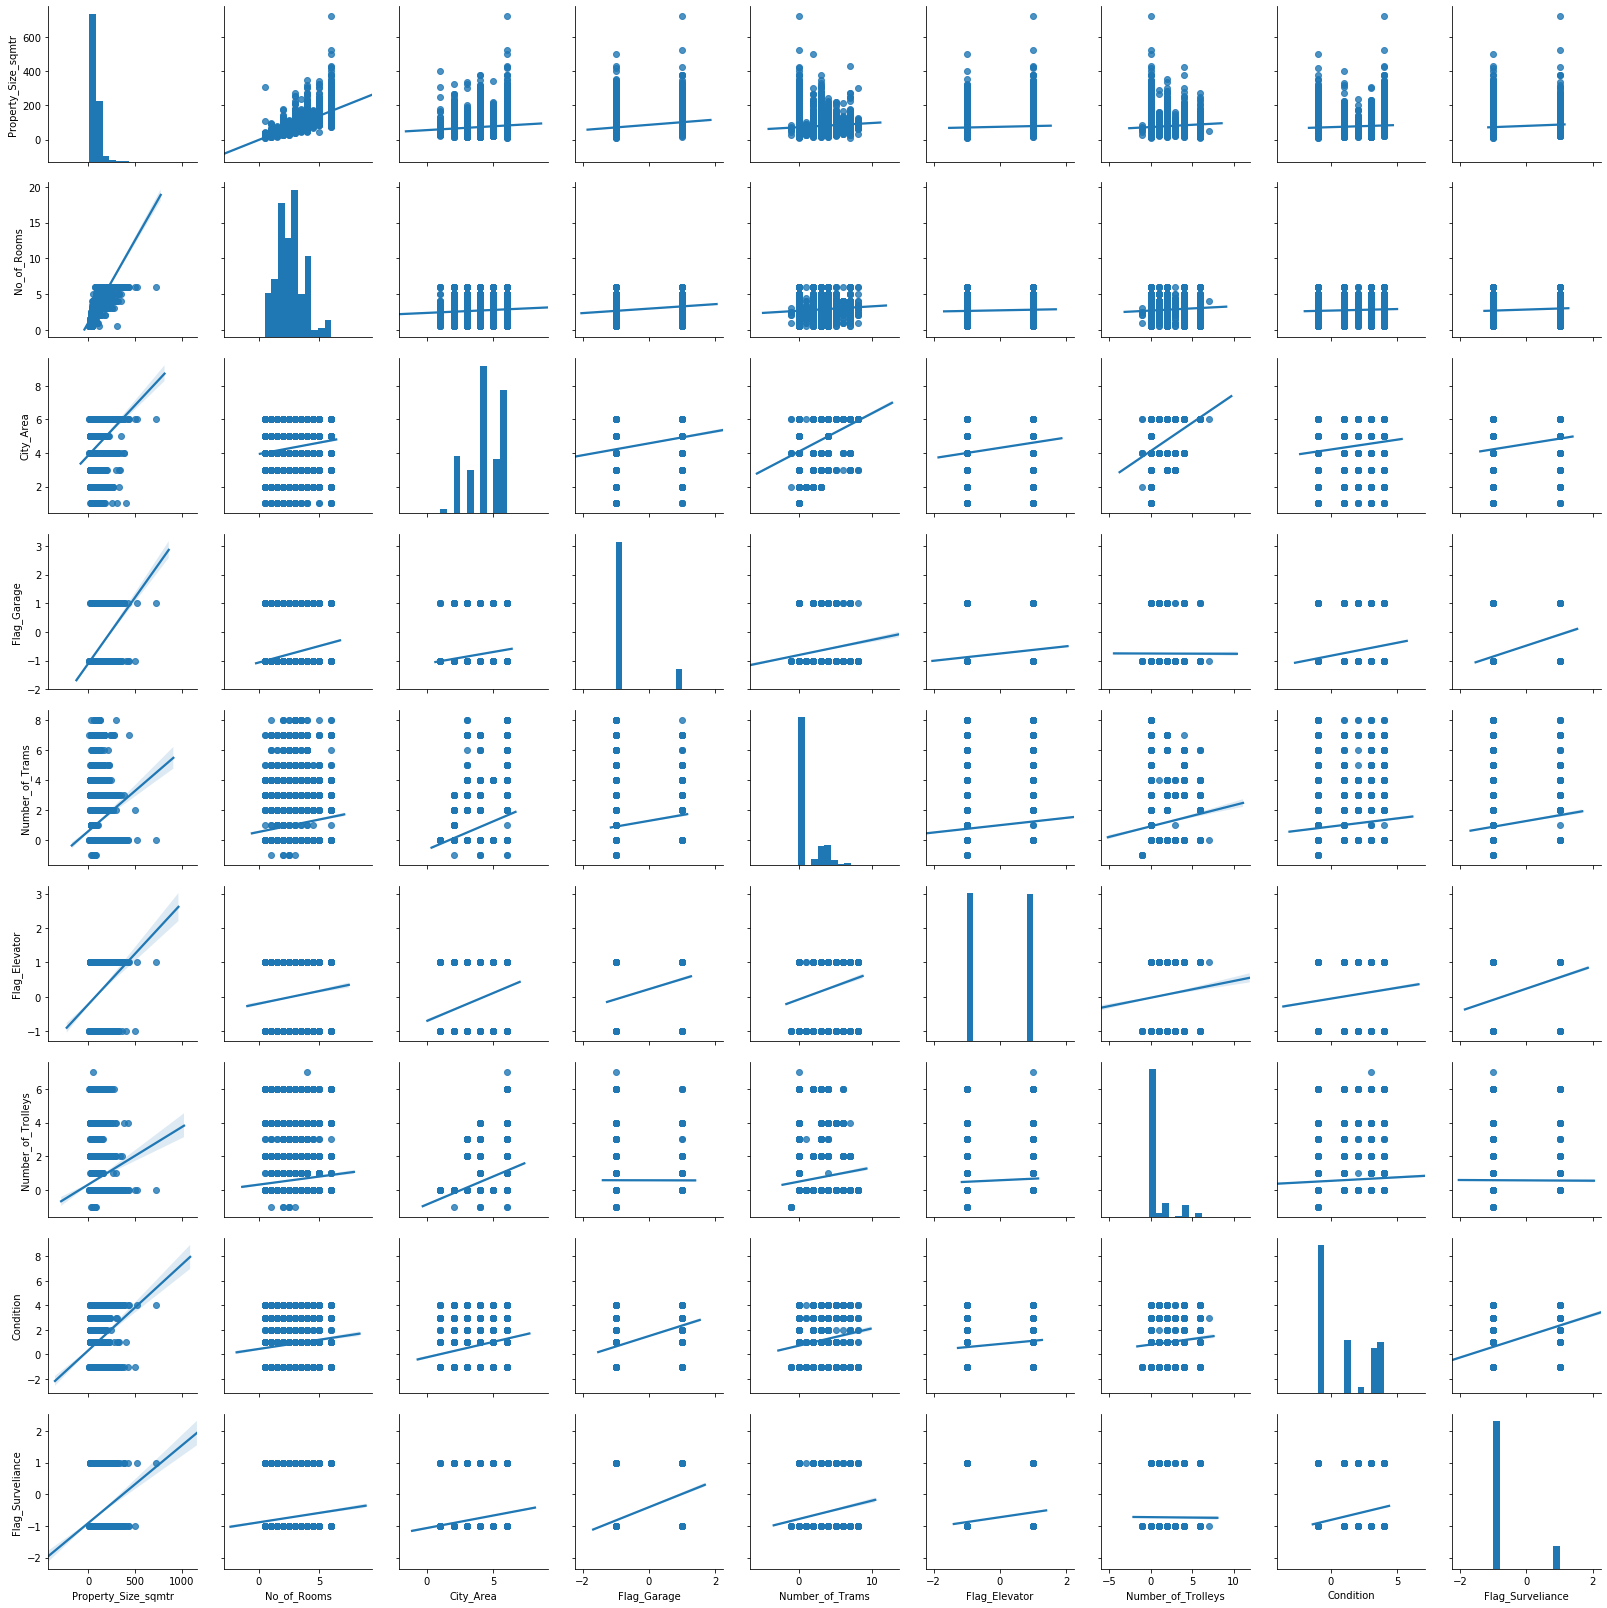

In [59]:
# pairplot
sns.pairplot(X_train[var], kind='reg')

# Modeling

In [46]:
# X_train.drop('Price_sqmtr',axis=1,inplace=True)
X_test.drop('Price_sqmtr',axis=1,inplace=True)

### Logistic Regression

In [28]:
from sklearn import linear_model
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train[var], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE :20858.85015724892
MSE: 1592220722.2004156
R2: 0.7236843996022067


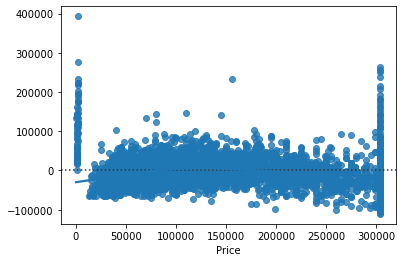

In [30]:
print('MAE :' + str(median_absolute_error(y_test, model.predict(X_test[var]))))
print('MSE: ' + str(mean_squared_error(y_test, model.predict(X_test[var]))))
print('R2: ' + str(r2_score(y_test, model.predict(X_test[var]))))
sns.residplot(y_test, model.predict(X_test[var]),lowess=True)

In [74]:
dump(rfr, 'models/model.joblib') 

['models/model.joblib']

In [31]:
#def transform_vars(df):
#
#    numeric_feats = df.dtypes[df.dtypes != "object"].index
#
#    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
#    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
#    skewed_features = high_skew.index
#
#    for feat in skewed_features:
#        if df[feat].min()<0:
#            df[feat] = boxcox1p(df[feat]+abs(df[feat].min()), boxcox_normmax(df[feat] + abs(df[feat].min()) + 1))
#        else:
#            boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
#    return df

### Logistic Regression with log transformation - led to lower r2

In [32]:
model.fit(X_train[var], np.log1p(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE :0.20679868043429472
MAE :0.2781003411401313
R2: 0.496587299722996


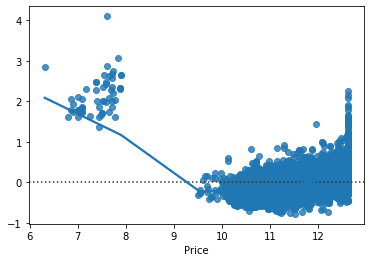

In [33]:
print('MAE :' + str(median_absolute_error(np.log1p(y_test), model.predict(X_test[var]))))
print('MAE :' + str(mean_squared_error(np.log1p(y_test), model.predict(X_test[var]))))
print('R2: ' + str(r2_score(np.log1p(y_test), model.predict(X_test[var]))))
sns.residplot(np.log1p(y_test), model.predict(X_test[var]),lowess=True)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(max_depth=4, random_state=100, n_estimators=200)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

MAE :19397.764755529948
MSE :1430293156.3900228
R2: 0.7517854737460088


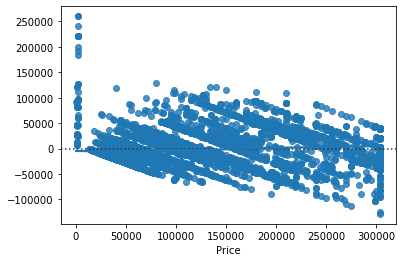

In [63]:
# significant change in R2 and MAE, but it seem that residuals are not random
print('MAE :' + str(median_absolute_error(y_test, rfr.predict(X_test))))
print('MSE :' + str(mean_squared_error(y_test, rfr.predict(X_test))))
print('R2: ' + str(r2_score(y_test, rfr.predict(X_test))))
sns.residplot(y_test, rfr.predict(X_test),lowess=True)

In [ ]:
# property size seems to be most important feature
plt.figure(figsize=(16, 8))
feature_importance = rfr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [73]:
dump(rfr, 'models/rfr.joblib') 

['models/rfr.joblib']

## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=200, max_depth=4, random_state=100)

In [38]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=100, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

MAE :12055.229449536957
MSE :785818067.0025367
R2: 0.863628334966546


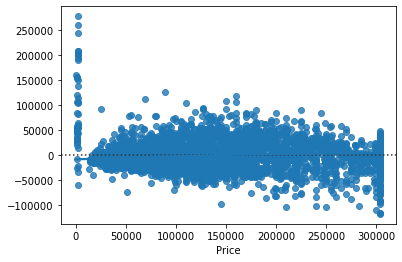

In [47]:
# significant change in R2 and MAE
print('MAE :' + str(median_absolute_error(y_test, GBR.predict(X_test))))
print('MSE :' + str(mean_squared_error(y_test, GBR.predict(X_test))))
print('R2: ' + str(r2_score(y_test, GBR.predict(X_test))))
sns.residplot(y_test, GBR.predict(X_test),lowess=True)

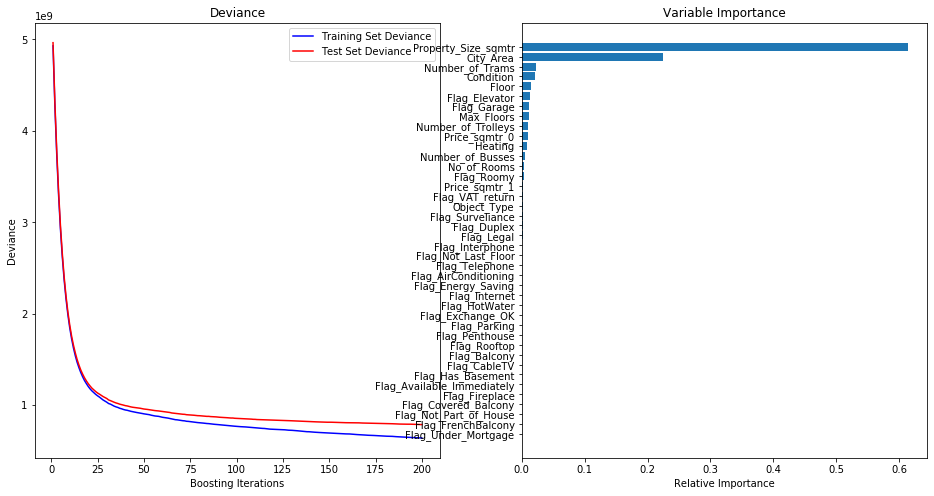

In [48]:
# no signs of overfitting, most important features are as expected: size in sqmtr and city area
test_score = np.zeros((200,), dtype=np.float64)

for i, y_pred in enumerate(GBR.staged_predict(X_test)):
    test_score[i] = GBR.loss_(y_test, y_pred)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(200) + 1, GBR.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(200) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

feature_importance = GBR.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
dump(GBR, 'models/GBR_Model.joblib') 

['models/GBR_Model.joblib']

# XGB

In [50]:
import xgboost as xgb

In [51]:
xgboost = xgb.XGBRegressor(learning_rate=0.01,n_estimators=5000,
                                     max_depth=4, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006,early_stopping_rounds=30)

In [52]:
xgboost.fit(X_train, y_train)

C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, early_stopping_rounds=30,
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=4, min_child_weight=0, missing=None,
             n_estimators=5000, n_jobs=1, nthread=-1,
             objective='reg:squarederror', random_state=0, reg_alpha=6e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
             subsample=0.7, verbosity=1)

MAE :11176.40625
MSE :697394790.0559659
R2: 0.8789734002065377


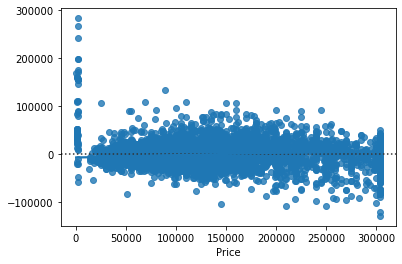

In [53]:
print('MAE :' + str(median_absolute_error(y_test, xgboost.predict(X_test))))
print('MSE :' + str(mean_squared_error(y_test, xgboost.predict(X_test))))
print('R2: ' + str(r2_score(y_test, xgboost.predict(X_test))))
sns.residplot(y_test, xgboost.predict(X_test),lowess=True)

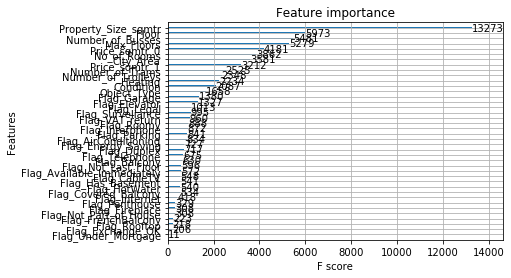

In [54]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgboost)
pyplot.show()

In [57]:
r2_trn={}
r2_tst={}
lr = [0.01,0.05,0.1]
reg_alpha = [0.0001, 0.0005, 0.001]
depth = [3,5,7]
for i in range(len(lr)):
    for j in range(len(reg_alpha)):
        for k in range(len(depth)):
            xgboost = xgb.XGBRegressor(learning_rate=lr[i],n_estimators=1000,
                                     max_depth=depth[k], min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=100,
                                     reg_alpha=reg_alpha[j])
            xgboost.fit(X_train, y_train)
            r2_trn[str(i) + ',' + str(j) + ',' + str(k)] = r2_score(y_train, xgboost.predict(X_train))
            r2_tst[str(i) + ',' + str(j) + ',' + str(k)] = r2_score(y_test, xgboost.predict(X_test))         

C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'b

In [62]:
pd.DataFrame.from_dict(r2_trn,orient='index').sort_values(by=0,ascending=False).head()

,0
"2,2,2",0.997041
"2,1,2",0.997041
"2,0,2",0.997025
"1,0,2",0.990019
"1,2,2",0.989962


In [60]:
xgboost = xgb.XGBRegressor(learning_rate=lr[1],n_estimators=5000,
                                     max_depth=depth[2], min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=reg_alpha[0],early_stopping_rounds=30)
xgboost.fit(X_train,y_train)

C:\Users\neven\Anaconda3\envs\dash\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, early_stopping_rounds=30,
             gamma=0, importance_type='gain', learning_rate=0.05,
             max_delta_step=0, max_depth=7, min_child_weight=0, missing=None,
             n_estimators=5000, n_jobs=1, nthread=-1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.0001,
             reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
             subsample=0.7, verbosity=1)

MAE :7764.78515625
MSE :563355045.8172191
R2: 0.9022347934858007


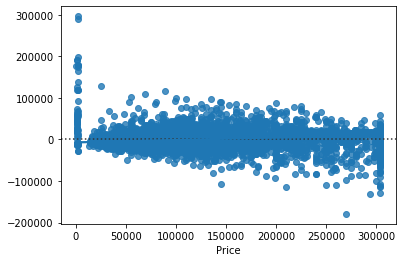

In [61]:
# no significant difference between XGB and GBR
print('MAE :' + str(median_absolute_error(y_test, xgboost.predict(X_test))))
print('MSE :' + str(mean_squared_error(y_test, xgboost.predict(X_test))))
print('R2: ' + str(r2_score(y_test, xgboost.predict(X_test))))
sns.residplot(y_test, xgboost.predict(X_test),lowess=True)

In [65]:
dump(xgboost, 'models/XGB_Model.joblib') 

['models/XGB_Model.joblib']

In [66]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [67]:
lasso = Lasso()
el_net = ElasticNet()
ridge  = Ridge()

In [68]:
lasso.fit(X_train[var],y_train)
el_net.fit(X_train[var],y_train)
ridge.fit(X_train[var],y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

MAE :20859.71243967231
MSE :1592223231.1181552
R2: 0.7236839642020754


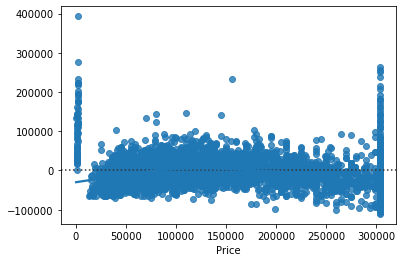

In [69]:
# Lasso
print('MAE :' + str(median_absolute_error(y_test, lasso.predict(X_test[var]))))
print('MSE :' + str(mean_squared_error(y_test, lasso.predict(X_test[var]))))
print('R2: ' + str(r2_score(y_test, lasso.predict(X_test[var]))))
sns.residplot(y_test, lasso.predict(X_test[var]),lowess=True)

MAE :20151.88707466841
MSE :1666093893.6526666
R2: 0.7108643744395469


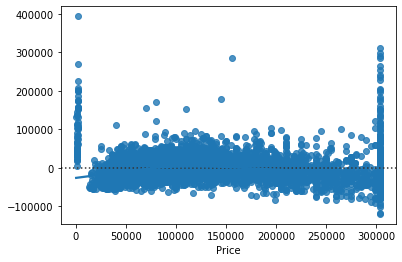

In [70]:
# elastic net
print('MAE :' + str(median_absolute_error(y_test, el_net.predict(X_test[var]))))
print('MSE :' + str(mean_squared_error(y_test, el_net.predict(X_test[var]))))
print('R2: ' + str(r2_score(y_test, el_net.predict(X_test[var]))))
sns.residplot(y_test, el_net.predict(X_test[var]),lowess=True)

MAE :20860.312636627306
MSE :1592224376.686906
R2: 0.7236837653989114


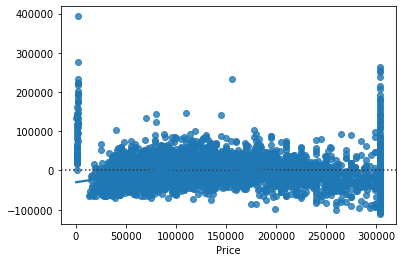

In [71]:
#ridge
print('MAE :' + str(median_absolute_error(y_test, ridge.predict(X_test[var]))))
print('MSE :' + str(mean_squared_error(y_test, ridge.predict(X_test[var]))))
print('R2: ' + str(r2_score(y_test, ridge.predict(X_test[var]))))
sns.residplot(y_test, ridge.predict(X_test[var]),lowess=True)

In [72]:
dump(lasso, 'models/lass.joblib') 
dump(el_net, 'models/el_net.joblib') 
dump(ridge, 'models/ridge.joblib') 

['models/ridge.joblib']